<h1> Data Analytics Project </h1>

<h3> United Kingdom Road Accident Data Analysis </h3>
<h3> Inclusive Years: 2016 - 2020 </h3>
<p> Analyst: Bianca Sophia S. Roxas <p>

In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')

In [3]:
deng = pd.read_csv('dataset\\dengue.csv')

In [4]:
deng

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> Data Preparation </h1>

In [5]:
deng.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Data Cleansing</h1>

In [6]:
deng.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [7]:
deng.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [8]:
deng['Month'] = deng['Month'].astype('category')
deng['Region'] = deng['Region'].astype('category')

In [9]:
deng.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Extraxting date information using pandas date time</h1>

In [10]:
print(deng['Month'].unique())

['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']


In [11]:
deng.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>Data Analytics</h1>

<h1> Insight 1 </h1>
<h3> What is the total number of Dengue cases in 2019? </h3> 
<h5>2019 saw a significant surge in Dengue cases, with an alarming increase in reported cases throughout the year.</h5>

In [141]:
df_2019 = deng[deng['Year'] == 2019]

total_cases_2019 = df_2019['Dengue_Cases'].sum()
print(f"Total number of Dengue cases in 2019: {total_cases_2019}")

Total number of Dengue cases in 2019: 441902


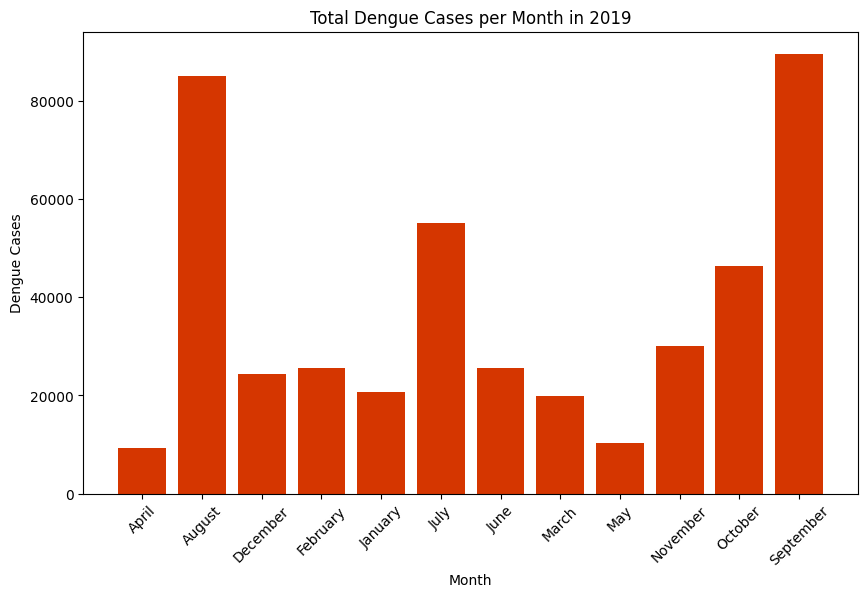

In [227]:
monthly_cases_2019 = df_2019.groupby('Month')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_cases_2019['Month'], monthly_cases_2019['Dengue_Cases'], color='#d53600')
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.title("Total Dengue Cases per Month in 2019")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 2 </h1>
<h3> Which region had the highest number of Dengue cases in 2018? </h3>
<h5>The CAR region experienced a high number of Dengue cases in 2018, contributing significantly to the nationwide numbers.</h5>

In [52]:
df_2018 = deng[deng['Year'] == 2018]

highest_cases_region_2018 = df_2018.groupby('Region')['Dengue_Cases'].sum().idxmax()
highest_cases_2018 = df_2018.groupby('Region')['Dengue_Cases'].sum().max()
print(f"The region with the highest number of Dengue cases in 2018 is {highest_cases_region_2018} with {highest_cases_2018} cases.")


The region with the highest number of Dengue cases in 2018 is Region III with 31726 cases.


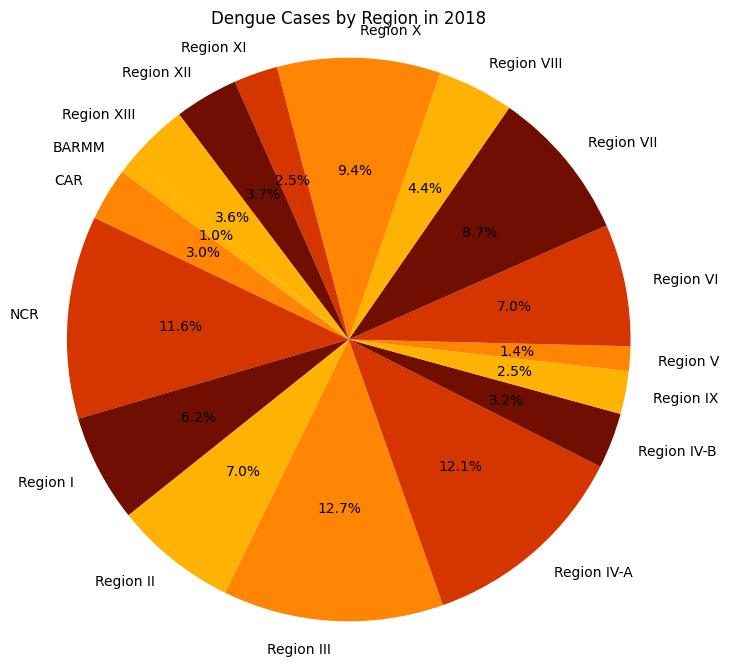

In [226]:
region_cases_2018 = df_2018.groupby('Region')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(region_cases_2018['Dengue_Cases'], labels=region_cases_2018['Region'], autopct='%1.1f%%', startangle=140, colors=['#feb204', '#ff8503', '#d53600', '#700e01'])
plt.title("Dengue Cases by Region in 2018")
plt.axis('equal')
plt.show()


<h1> Insight 3 </h1> 
<h3> What was the monthly distribution of Dengue cases in 2019? </h3> 
<h5>Dengue cases peaked in the middle of the year (June to August), aligning with the wet season and higher mosquito activity.</h5>

In [54]:

df_2019 = deng[deng['Year'] == 2019]

monthly_cases_2019 = df_2019.groupby('Month')['Dengue_Cases'].sum()

In [55]:
monthly_cases_2019

Month
April         9252
August       85038
December     24397
February     25494
January      20672
July         55220
June         25523
March        19798
May          10387
November     30097
October      46382
September    89642
Name: Dengue_Cases, dtype: int64

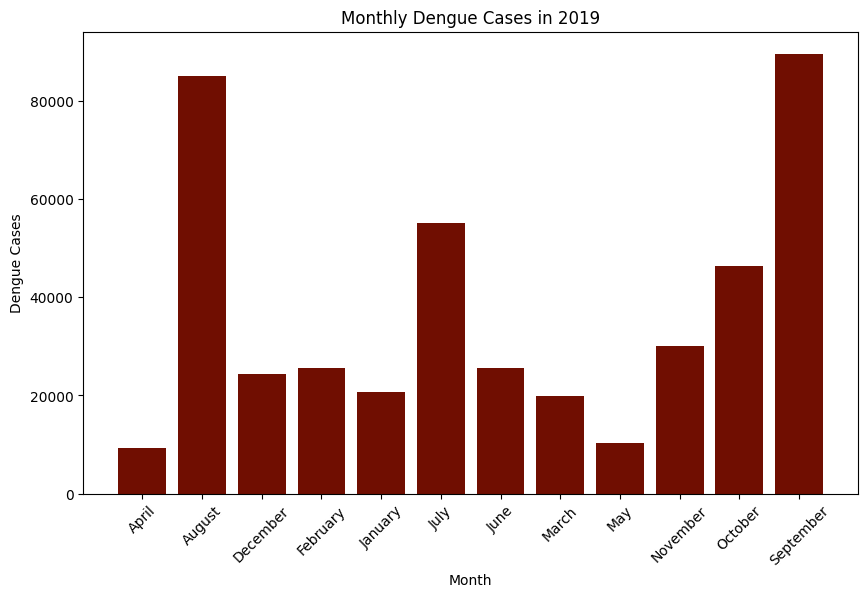

In [225]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_cases_2019.index, monthly_cases_2019.values, color='#700e01')
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.title("Monthly Dengue Cases in 2019")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 4 </h1> 
<h3> Total Dengue Cases by Region </h3>
<h5>The region with the highest dengue cases consistently reports the most significant outbreaks.</h5>


In [57]:
cases_per_region = deng.groupby('Region')['Dengue_Cases'].sum().reset_index()

In [58]:
cases_per_region

,Region,Dengue_Cases
0,BARMM,11537
1,CAR,30582
2,NCR,115966
3,Region I,59066
4,Region II,45141
5,Region III,131064
6,Region IV-A,163029
7,Region IV-B,30849
8,Region IX,47781
9,Region V,22167


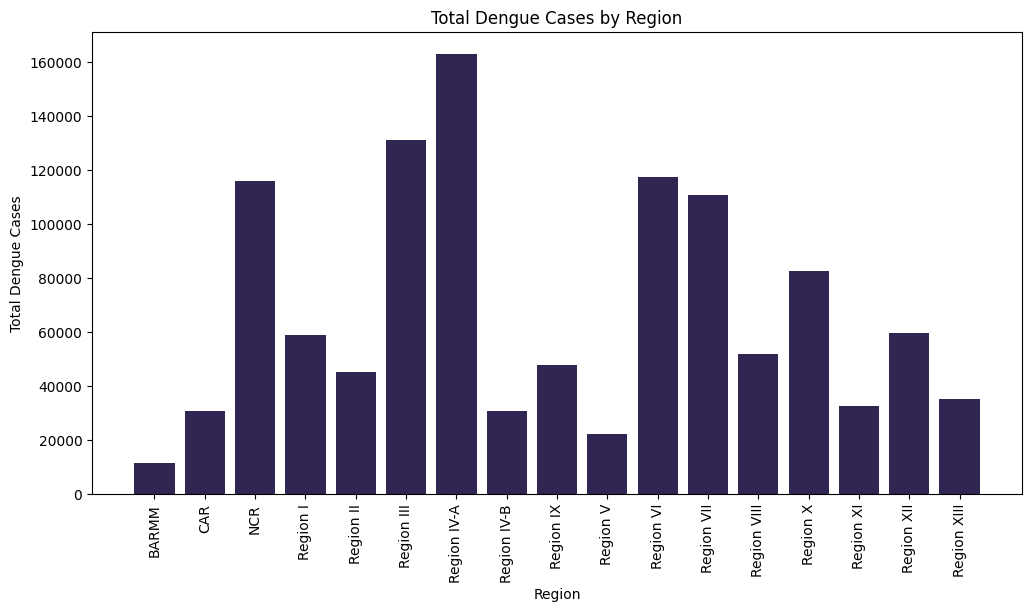

In [229]:
plt.figure(figsize=(12, 6))
plt.bar(cases_per_region['Region'], cases_per_region['Dengue_Cases'], color='#312551')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.title('Total Dengue Cases by Region')
plt.xticks(rotation=90)
plt.show()

<h1> Insight 5 </h1> 
<h3> What were the seasonal variations in Dengue cases across different regions in 2019? </h3> 
<h5>The seasonal peak in Dengue cases corresponded to the rainy season, which is evident in most regions in mid-year.</h5>

In [26]:
seasonal_cases_2019 = df_2019.groupby(['Month', 'Region'])['Dengue_Cases'].sum().unstack()

In [27]:
seasonal_cases_2019

Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Month,,,,,,,,,,,,,,,,,
April,221,163,532,183,429,460,892,364,948,223,1199,571,488,992,339,920,328
August,811,1536,5481,4178,2446,6593,15047,2125,4233,2281,18090,3858,7557,4807,1284,3579,1132
December,288,367,3257,819,581,2797,4868,413,972,563,1164,3680,740,1869,501,482,1036
February,309,694,2348,633,2136,1840,3252,710,1003,387,2003,2815,1178,1710,841,1588,2047
January,201,470,2082,596,1797,1813,2157,435,775,342,1426,2461,1000,1476,627,978,2036
July,772,1226,1839,2587,1922,2228,6365,1628,7024,1371,13564,2124,3699,3893,1115,3114,749
June,554,547,817,743,1171,1371,2531,941,3201,547,4859,1030,1031,2415,584,2689,492
March,303,398,1377,399,1355,1230,2252,799,1105,436,2262,1831,815,1684,806,1658,1088
May,284,187,442,197,486,428,909,248,1602,205,1386,535,427,1184,257,1286,324


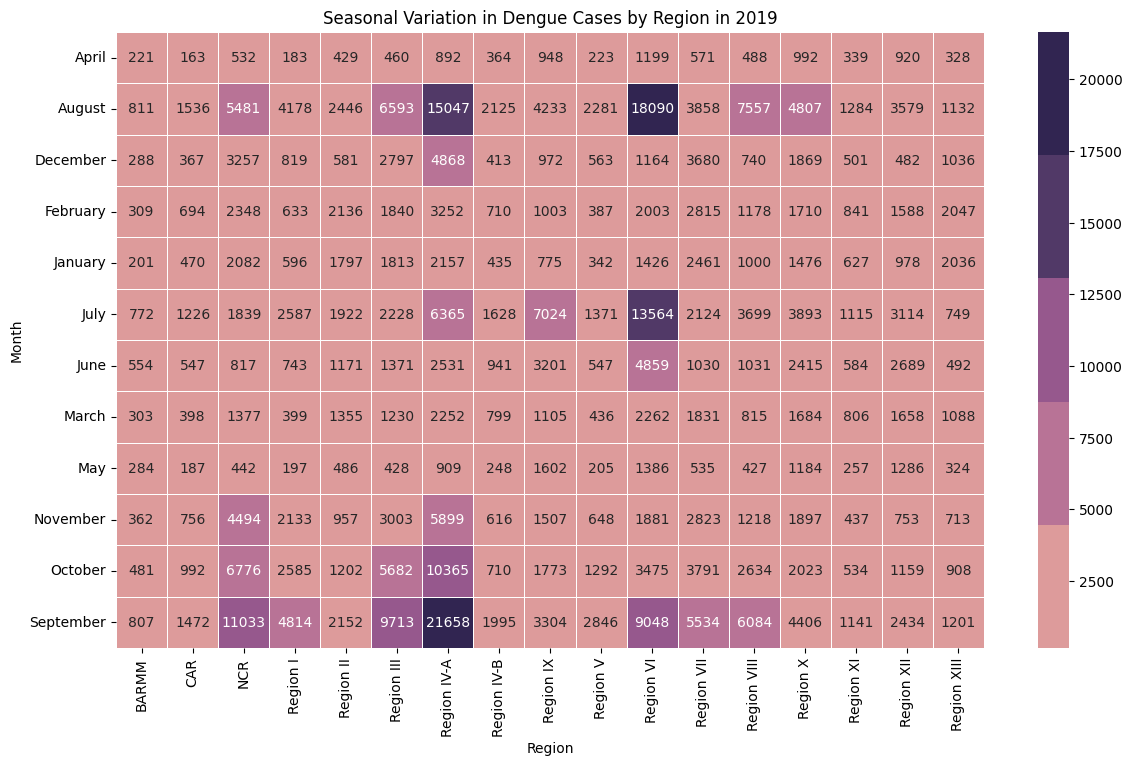

In [234]:

custom_colors = ['#dd9b9b', '#b87396', '#96588d', '#513967', '#312551']
custom_cmap = ListedColormap(custom_colors)


plt.figure(figsize=(14, 8))
sns.heatmap(seasonal_cases_2019, cmap=custom_cmap, annot=True, fmt='.0f', linewidths=0.5)


plt.xlabel("Region")
plt.ylabel("Month")
plt.title("Seasonal Variation in Dengue Cases by Region in 2019")


plt.show()

<h1> Insight 6 </h1> 
<h3> Proportion of Dengue Deaths by Region</h3> 
<h5>Some regions have a disproportionately higher number of deaths despite having fewer cases.</h5>

In [34]:
deaths_by_region = deng.groupby('Region')['Dengue_Deaths'].sum().reset_index()

In [35]:
deaths_by_region

,Region,Dengue_Deaths
0,BARMM,332
1,CAR,1008
2,NCR,4008
3,Region I,157
4,Region II,193
5,Region III,482
6,Region IV-A,652
7,Region IV-B,130
8,Region IX,532
9,Region V,185


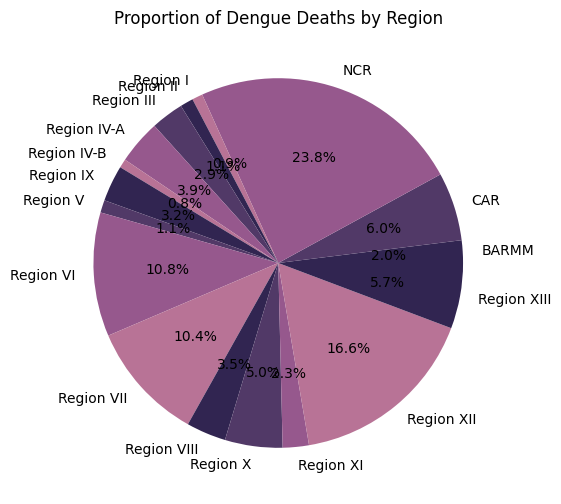

In [235]:
plt.figure(figsize=(10,6))
plt.pie(deaths_by_region['Dengue_Deaths'], labels=deaths_by_region['Region'], autopct='%1.1f%%', colors=['#312551','#513967','#96588d','#b87396'])

plt.title("Proportion of Dengue Deaths by Region")
plt.show()

<h1> Insight 7 </h1>
<h3> Trends in Dengue Deaths During Peak Cases </h3>
<h5> During peak dengue outbreaks, there is a noticeable increase in deaths, though the rate of death remains lower compared to cases. </h5>

In [73]:
peak_cases = deng[deng['Dengue_Cases'] > 1000]

peak_cases_summary = peak_cases.groupby('Year').agg(
    Total_Dengue_Cases=('Dengue_Cases', 'sum'),
    Total_Dengue_Deaths=('Dengue_Deaths', 'sum')
).reset_index()

peak_cases_summary

,Year,Total_Dengue_Cases,Total_Dengue_Deaths
0,2016,146181,4664
1,2017,93733,958
2,2018,192979,875
3,2019,393009,1502
4,2020,46643,130


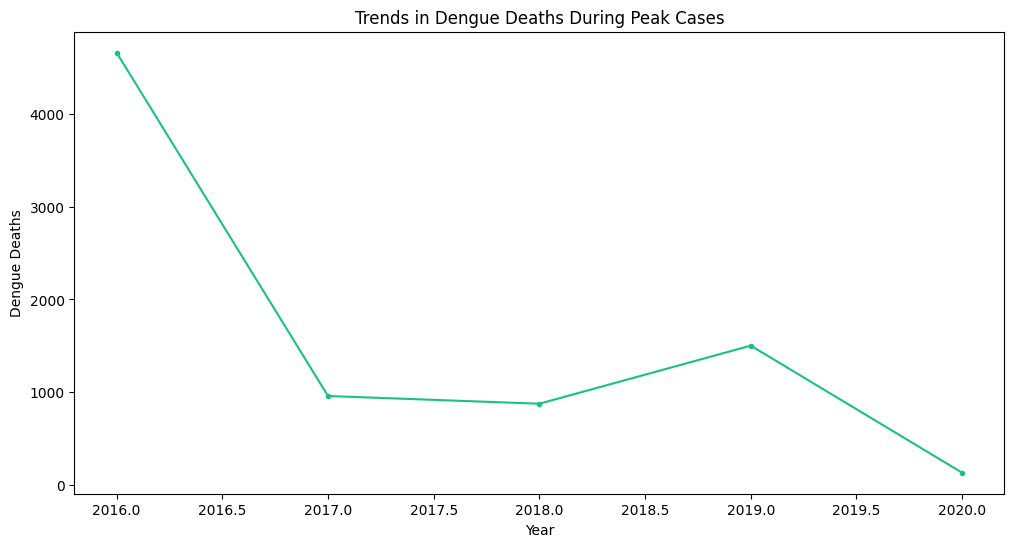

In [236]:
plt.figure(figsize=(12, 6))
plt.plot(peak_cases_deaths['Year'], peak_cases_deaths['Dengue_Deaths'], marker='.', color='#1ac182')  # Color changed to #1ac182
plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.title('Trends in Dengue Deaths During Peak Cases')
plt.show()

<h1> Insight 8 </h1>
<h3> Variations in Dengue Deaths by Region </h3>
<h5> Different regions experience fluctuations in dengue deaths, with some areas showing higher mortality rates. </h5>

In [77]:
death_variations = deng.groupby(['Region', 'Year'])['Dengue_Deaths'].sum().unstack()
death_variations

Year,2016,2017,2018,2019,2020
Region,,,,,
BARMM,243,2,33,31,23
CAR,888,12,8,27,73
NCR,2987,168,180,190,483
Region I,21,23,53,42,18
Region II,11,34,62,77,9
Region III,65,81,85,194,57
Region IV-A,108,110,157,242,35
Region IV-B,18,12,51,26,23
Region IX,41,313,54,108,16


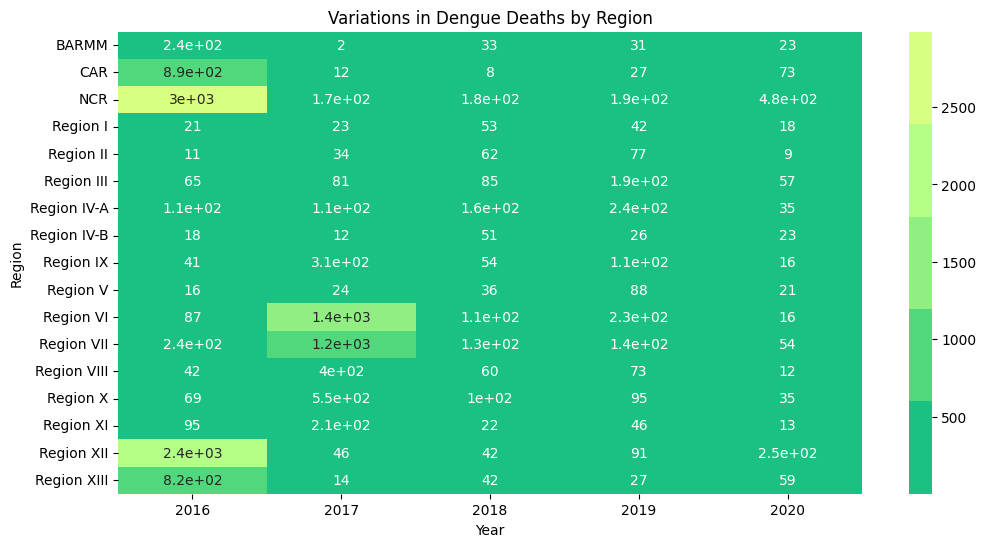

In [237]:

custom_colors = ['#1ac182', '#51d87c', '#91ee83', '#b4ff85', '#d8ff81']
custom_cmap = ListedColormap(custom_colors)

plt.figure(figsize=(12, 6))
sns.heatmap(death_variations, cmap=custom_cmap, annot=True)

plt.title('Variations in Dengue Deaths by Region')
plt.show()

<h1> Insight 9 </h1>
<h3> Distribution of Dengue Cases in the Month of July Across Multiple Years </h3>
<h5> July consistently shows a higher incidence of dengue cases, indicating a potential seasonal pattern or environmental factor. </h5>

In [80]:
july_data = deng[deng['Month'] == 'July']
july_data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
6,July,2016,Region I,1295,2
18,July,2017,Region I,1032,2
30,July,2018,Region I,3374,13
42,July,2019,Region I,2587,9
54,July,2020,Region I,452,2
...,...,...,...,...,...
966,July,2016,BARMM,491,2
978,July,2017,BARMM,62,0
990,July,2018,BARMM,412,3
1002,July,2019,BARMM,772,2


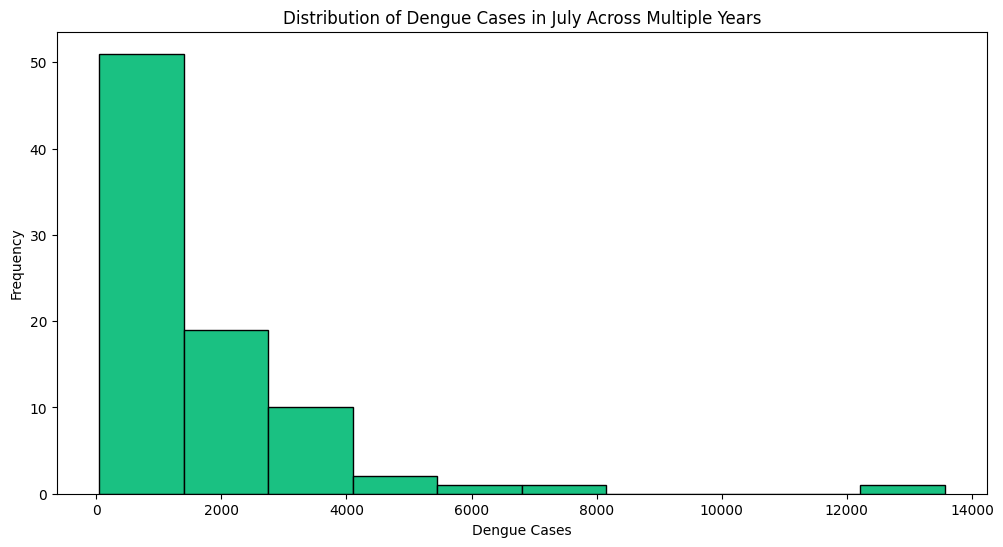

In [238]:
plt.figure(figsize=(12, 6))
plt.hist(july_data['Dengue_Cases'], bins=10, color='#1ac182', edgecolor='black')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Dengue Cases in July Across Multiple Years')
plt.show()


<h1> Insight 10 </h1>
<h3> Relationship Between Dengue Cases and Deaths Across Regions </h3>
<h5> Some regions with high case numbers have relatively low deaths, indicating effective response measures. </h5>


In [84]:
relationship_data = deng[['Dengue_Cases', 'Dengue_Deaths', 'Region']]
relationship_data

,Dengue_Cases,Dengue_Deaths,Region
0,705,1,Region I
1,374,0,Region I
2,276,0,Region I
3,240,2,Region I
4,243,1,Region I
...,...,...,...
1015,91,0,BARMM
1016,16,8,BARMM
1017,13,9,BARMM
1018,15,1,BARMM


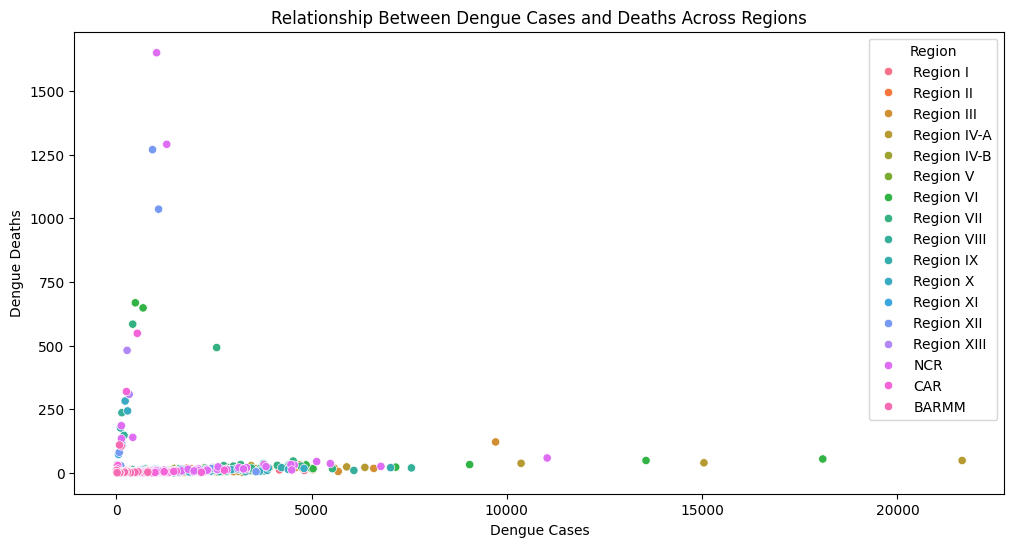

In [241]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', data=deng, hue='Region')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Relationship Between Dengue Cases and Deaths Across Regions')
plt.show()

<h1> Insight 11 </h1>
<h3> Distribution of Dengue Deaths in August Over the Years </h3>
<h5> August shows varying degrees of dengue-related deaths, with some years experiencing higher mortality rates than others. </h5>


In [97]:
august_data = deng[deng['Month'] == 'August']
august_data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
7,August,2016,Region I,1598,3
19,August,2017,Region I,1609,1
31,August,2018,Region I,3266,10
43,August,2019,Region I,4178,11
55,August,2020,Region I,1030,0
...,...,...,...,...,...
967,August,2016,BARMM,327,2
979,August,2017,BARMM,41,0
991,August,2018,BARMM,253,2
1003,August,2019,BARMM,811,6


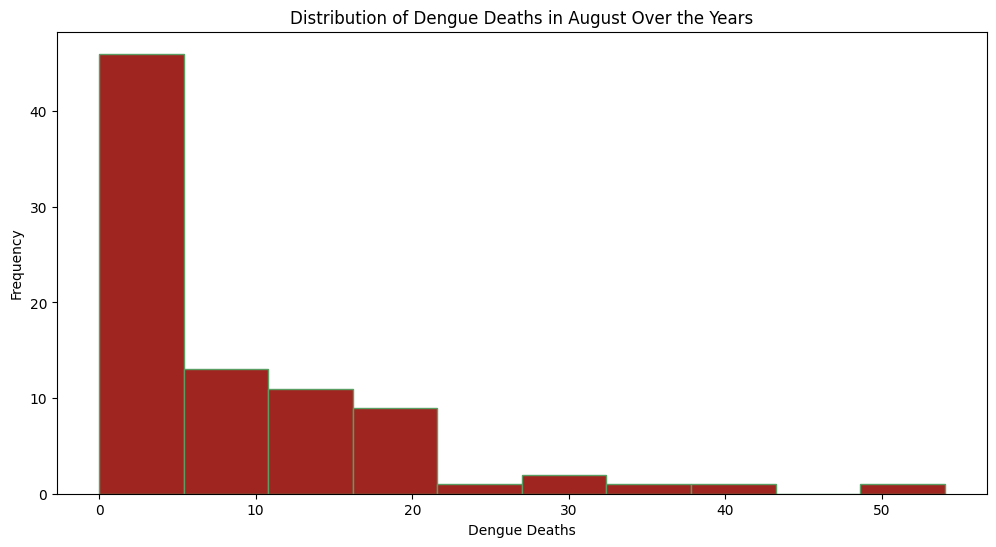

In [242]:
plt.figure(figsize=(12, 6))
plt.hist(august_data['Dengue_Deaths'], bins=10, color='#9f2620', edgecolor='#5a9e64')
plt.xlabel('Dengue Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Dengue Deaths in August Over the Years')
plt.show()


<h1> Insight 12 </h1>
<h3> Month-wise Distribution of Dengue Cases and Deaths Across Years </h3>
<h5> The heatmap indicates that certain months show more consistent spikes in both cases and deaths, suggesting seasonal outbreaks. </h5>


In [100]:
heatmap_data = deng.pivot_table(values=['Dengue_Cases', 'Dengue_Deaths'], index='Month', columns='Year', aggfunc='sum')

heatmap_data

Dengue_Cases                             Dengue_Deaths             \
Year              2016   2017   2018   2019   2020          2016  2017 2018   
Month                                                                         
April             7269   6343   6860   9252   2784            40    43   41   
August           36195  25039  34210  85038   7072           132   111  156   
December         13490  13235  31353  24397   5956            83    73  135   
February         12386   9872  10466  25494  19583            43    64   43   
January          17052  15623  12657  20672  18324            73    95   65   
July             29744  18340  30363  55220   4575           123    74  153   
June             10831   7589  11502  25523   2665            69    42   78   
March             9300   7696   7944  19798  12838            47    36   58   
May               8092   4853   6594  10387   2461            41    23   31   
November         16252  12553  30191  30097   5807           104    78  131   
October          21943  15259  30026  46382   4035          3954  2098  150   
September        26990  17753  38617  89642   4941          3418  1826  185   

                     
Year      2019 2020  
Month                
April       59   17  
August     280   35  
December    91   22  
February   101   64  
January     94   67  
July       232   29  
June       119   14  
March      103   47  
May         56   11  
November    88  212  
October    133  335  
September  377  342

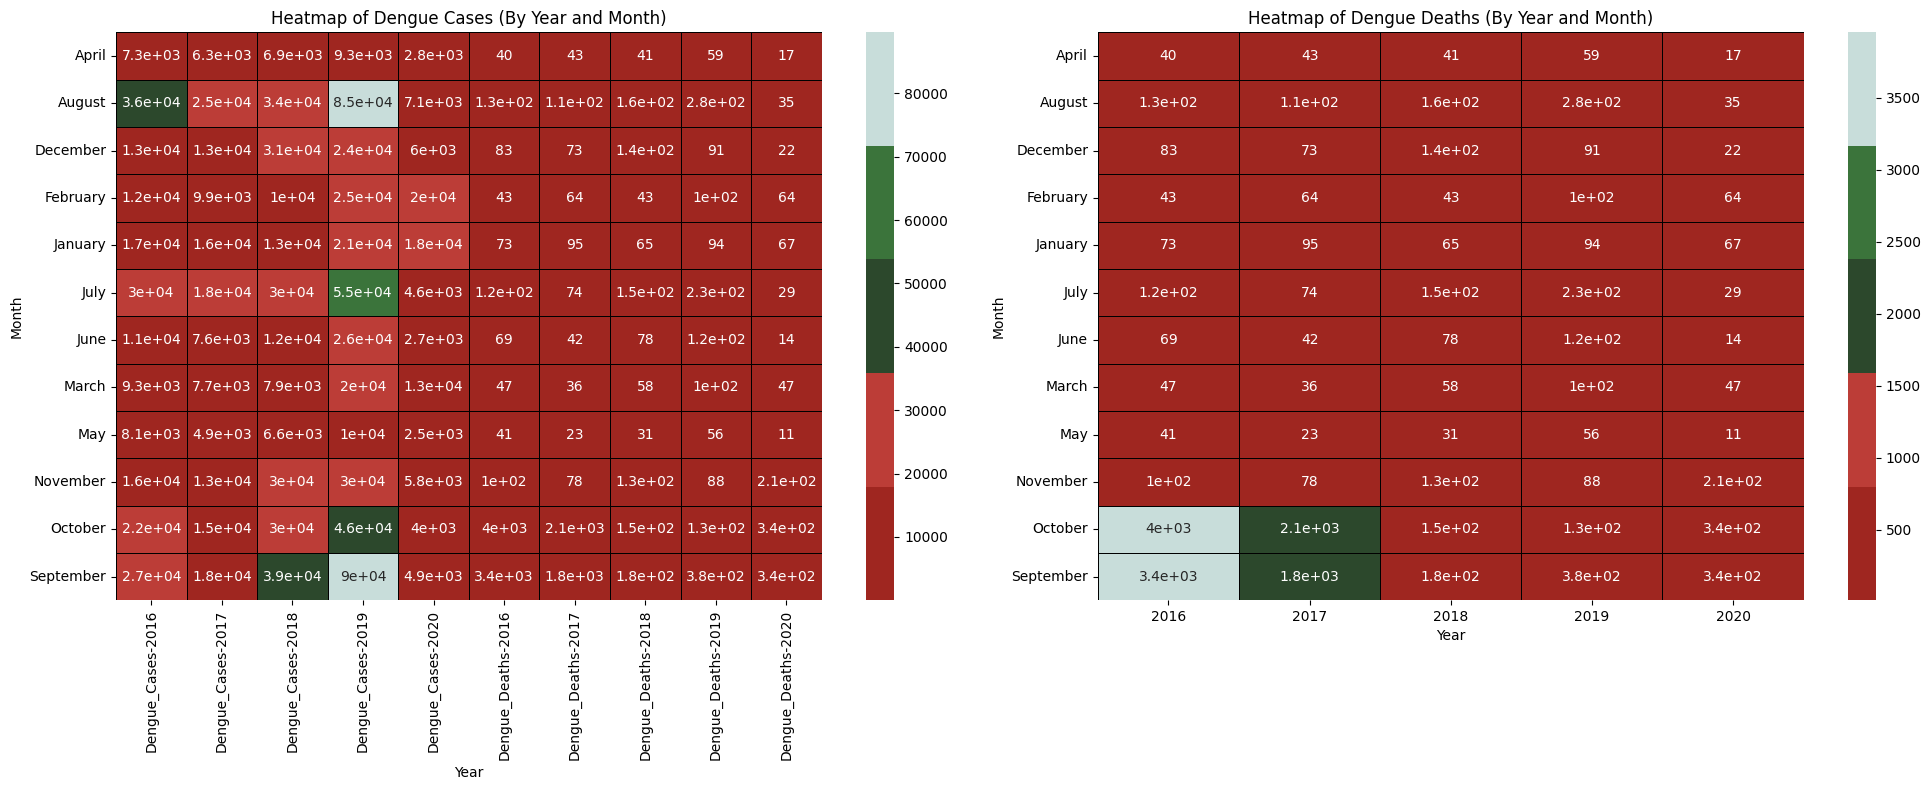

In [244]:

custom_colors = ['#9f2620', '#bc3d37', '#2c482c', '#3b743b', '#c8ddda']
custom_cmap = ListedColormap(custom_colors)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, linewidths=0.5, linecolor='black')
plt.title('Heatmap of Dengue Cases (By Year and Month)')
plt.xlabel('Year')
plt.ylabel('Month')

plt.subplot(1, 2, 2)
sns.heatmap(death_heatmap_data, annot=True, cmap=custom_cmap, linewidths=0.5, linecolor='black')
plt.title('Heatmap of Dengue Deaths (By Year and Month)')
plt.xlabel('Year')
plt.ylabel('Month')

plt.tight_layout()
plt.show()

<h1> Insight 13 </h1>
<h3> Comparison of Dengue Cases in CAR vs. BARMM </h3>
<h5> CAR generally experiences a higher number of Dengue cases than BARMM, indicating a regional difference in dengue prevalence. </h5>

In [109]:
dengue_by_region = deng.groupby('Region')['Dengue_Cases'].sum().reset_index()

dengue_by_region_filtered = dengue_by_region[dengue_by_region['Region'].isin(['BARMM', 'CAR'])]

dengue_by_region_filtered

,Region,Dengue_Cases
0,BARMM,11537
1,CAR,30582


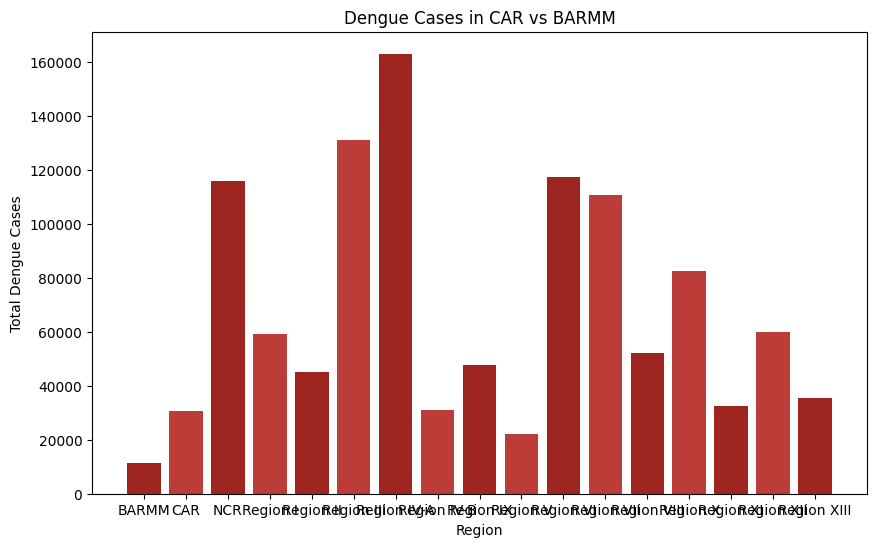

In [245]:
plt.figure(figsize=(10, 6))
plt.bar(dengue_by_region['Region'], dengue_by_region['Dengue_Cases'], color=['#9f2620', '#bc3d37'])
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.title('Dengue Cases in CAR vs BARMM')
plt.show()


<h1> Insight 14 </h1>
<h3> Dengue Deaths vs. Dengue Cases for CAR and BARMM (2019) </h3>
<h5> There is a positive correlation between the number of dengue deaths and the number of cases in CAR and BARMM, but the rate of deaths is slightly higher in CAR. </h5>

In [111]:
car_barmm_2019 = deng[(deng['Year'] == 2019) & deng['Region'].isin(['CAR', 'BARMM'])]

car_barmm_2019


,Month,Year,Region,Dengue_Cases,Dengue_Deaths
936,January,2019,CAR,470,2
937,February,2019,CAR,694,2
938,March,2019,CAR,398,0
939,April,2019,CAR,163,0
940,May,2019,CAR,187,1
941,June,2019,CAR,547,1
942,July,2019,CAR,1226,4
943,August,2019,CAR,1536,6
944,September,2019,CAR,1472,5
945,October,2019,CAR,992,1


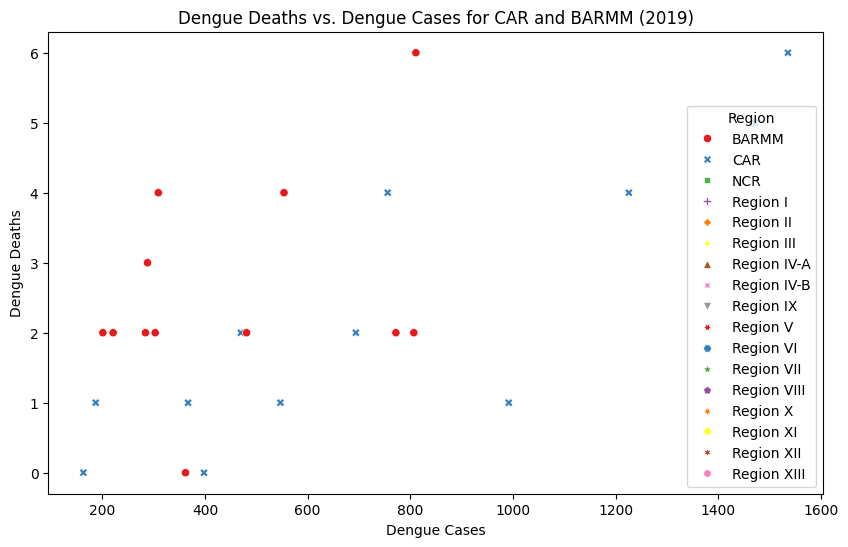

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_barmm_2019, x='Dengue_Cases', y='Dengue_Deaths', hue='Region', palette='Set1', style='Region')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Dengue Deaths vs. Dengue Cases for CAR and BARMM (2019)')
plt.show()

<h1> Insight 15 </h1>
<h3> Proportion of Dengue Cases in NCR, CALABARZON, and Region IV-A for 2020 </h3>
<h5> In 2020, NCR and CALABARZON had the highest proportion of dengue cases compared to Region IV-A, which had relatively fewer cases. </h5>


In [249]:
deng_2020_ncr_calabarzon = deng[(deng['Region'].isin(['NCR', 'CALABARZON', 'Region IV-A'])) & (deng['Year'] == 2020)]
cases_2020_ncr_calabarzon = deng_2020_ncr_calabarzon.groupby('Region', as_index=False)['Dengue_Cases'].sum()
cases_2020_ncr_calabarzon 

,Region,Dengue_Cases
0,NCR,7183
1,Region IV-A,9721


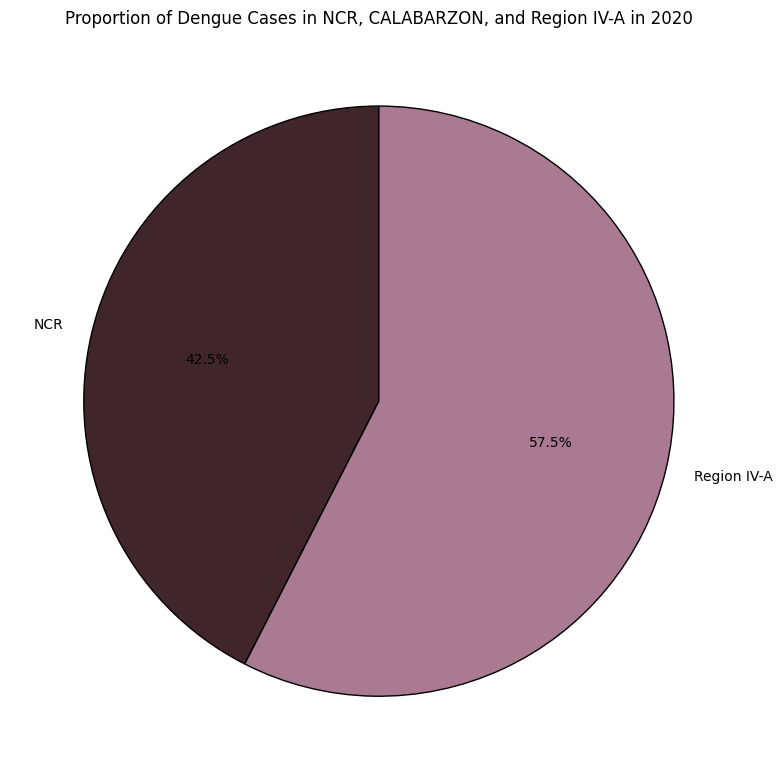

In [252]:
plt.figure(figsize=(8, 8))
plt.pie(cases_2020_ncr_calabarzon['Dengue_Cases'], 
        labels=cases_2020_ncr_calabarzon['Region'], 
        autopct='%1.1f%%', 
        colors=['#40262a', '#a97a92', '#ffd6d8', '#eb6f95', '#8d0140'],
        startangle=90, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Dengue Cases in NCR, CALABARZON, and Region IV-A in 2020')
plt.tight_layout() 
plt.show()


<h1> Insight 16 </h1>
<h3> Comparison of Dengue Cases Between Region I (Ilocos) and Region VI (Western Visayas) in 2018 </h3>
<h5> Region I had a higher number of dengue cases in 2018, while Region VI had fewer, showing regional differences in dengue outbreaks. </h5>


In [167]:
deng_region_1_6_2018 = deng[(deng['Region'].isin(['Region I', 'Region VI'])) & (deng['Year'] == 2018) & (deng['Dengue_Cases'] > 0)]
dengue_region_1_6_2018 = deng_region_1_6_2018.groupby(['Region', 'Year'])['Dengue_Cases'].sum().reset_index()

print(dengue_region_1_6_2018)


         Region  Year  Dengue_Cases
0         BARMM  2018             0
1           CAR  2018             0
2           NCR  2018             0
3      Region I  2018         15511
4     Region II  2018             0
5    Region III  2018             0
6   Region IV-A  2018             0
7   Region IV-B  2018             0
8     Region IX  2018             0
9      Region V  2018             0
10    Region VI  2018         17582
11   Region VII  2018             0
12  Region VIII  2018             0
13     Region X  2018             0
14    Region XI  2018             0
15   Region XII  2018             0
16  Region XIII  2018             0


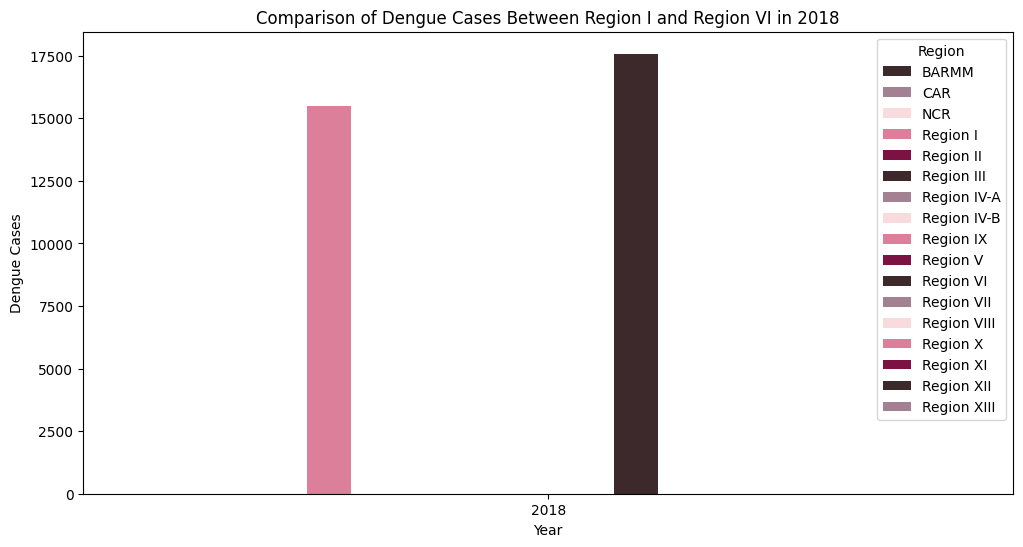

In [253]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dengue_region_1_6_2018, x='Year', y='Dengue_Cases', hue='Region', palette=['#40262a', '#a97a92', '#ffd6d8', '#eb6f95', '#8d0140'])
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Comparison of Dengue Cases Between Region I and Region VI in 2018')
plt.show()


<h1> Insight 17 </h1>
<h3> Dengue Deaths vs. Dengue Cases for Region II (Cagayan Valley) and Region VIII (Eastern Visayas) in 2019 </h3>
<h5> A scatter plot analysis shows a significant positive correlation between dengue cases and deaths in both regions, with Region VIII exhibiting a higher death count in 2019. </h5>


In [213]:
deng_region = deng[deng['Region'].isin(['Region II', 'Region VIII'])]
deng_region

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
60,January,2016,Region II,659,2
61,February,2016,Region II,408,2
62,March,2016,Region II,211,0
63,April,2016,Region II,138,0
64,May,2016,Region II,126,0
...,...,...,...,...,...
535,August,2020,Region VIII,138,0
536,September,2020,Region VIII,120,1
537,October,2020,Region VIII,95,0
538,November,2020,Region VIII,110,1


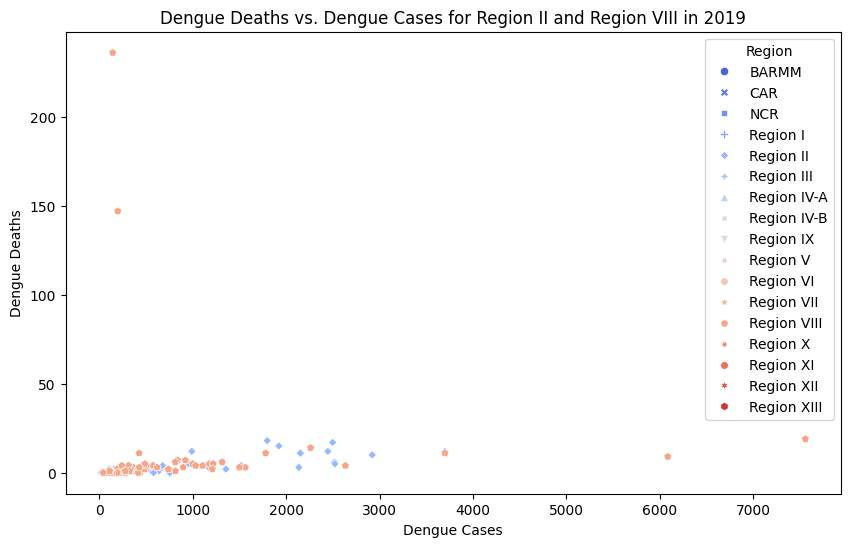

In [214]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=deng_region, x='Dengue_Cases', y='Dengue_Deaths', hue='Region', style='Region', palette="coolwarm")
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.title('Dengue Deaths vs. Dengue Cases for Region II and Region VIII in 2019')
plt.show()

<h1> Insight 18 </h1>
<h3> Regional Dengue Cases and Deaths Across Months in 2017 for Region IV-B (MIMAROPA) and Region V (Bicol) </h3>
<h5> A heatmap analysis indicates that Region IV-B (MIMAROPA) experienced the highest dengue cases during the rainy season months, while Region V saw significant spikes in the months of August and September. </h5>


In [178]:
deng_reg = deng[deng['Region'].isin(['Region IV-B', 'Region V'])]
cases_2017 = deng_reg.pivot_table(values='Dengue_Cases', index='Month', columns='Region', aggfunc='sum')
deaths_2017 = deng_reg.pivot_table(values='Dengue_Deaths', index='Month', columns='Region', aggfunc='sum')

deaths_2017

Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Month,,,,,,,,,,,,,,,,,
April,0,0,0,0,0,0,0,7,0,8,0,0,0,0,0,0,0
August,0,0,0,0,0,0,0,28,0,22,0,0,0,0,0,0,0
December,0,0,0,0,0,0,0,3,0,15,0,0,0,0,0,0,0
February,0,0,0,0,0,0,0,6,0,15,0,0,0,0,0,0,0
January,0,0,0,0,0,0,0,5,0,8,0,0,0,0,0,0,0
July,0,0,0,0,0,0,0,11,0,17,0,0,0,0,0,0,0
June,0,0,0,0,0,0,0,3,0,18,0,0,0,0,0,0,0
March,0,0,0,0,0,0,0,7,0,14,0,0,0,0,0,0,0
May,0,0,0,0,0,0,0,6,0,5,0,0,0,0,0,0,0


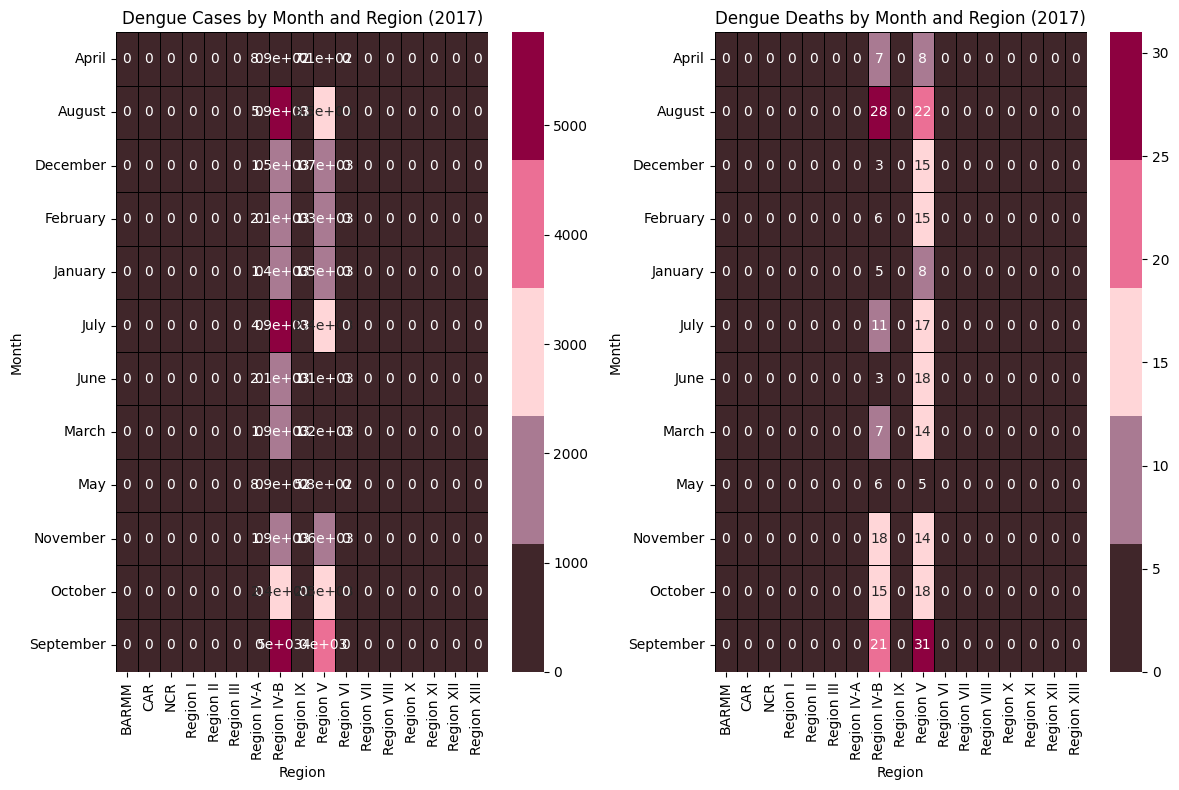

In [254]:

custom_palette = ['#40262a', '#a97a92', '#ffd6d8', '#eb6f95', '#8d0140']

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.heatmap(cases_2017, annot=True, cmap=ListedColormap(custom_palette), linewidths=0.5, linecolor='black')
plt.title('Dengue Cases by Month and Region (2017)')

plt.subplot(1, 2, 2)
sns.heatmap(deaths_2017, annot=True, cmap=ListedColormap(custom_palette), linewidths=0.5, linecolor='black')
plt.title('Dengue Deaths by Month and Region (2017)')

plt.tight_layout()
plt.show()

<h1> Insight 19 </h1>
<h3> Distribution of Dengue Deaths Across Region II (Cagayan Valley) and Region XII (Soccsksargen) (2016-2020) </h3>
<h5> The histogram reveals that Region II had a higher frequency of dengue deaths in 2017, while Region XII had more deaths in 2019. </h5>


In [184]:
deng_region_2 = deng[(deng['Region'] == 'Region II') | (deng['Region'] == 'Region XII')]
deng_region_2

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
60,January,2016,Region II,659,2
61,February,2016,Region II,408,2
62,March,2016,Region II,211,0
63,April,2016,Region II,138,0
64,May,2016,Region II,126,0
...,...,...,...,...,...
775,August,2020,Region XII,550,4
776,September,2020,Region XII,136,117
777,October,2020,Region XII,76,80
778,November,2020,Region XII,117,27


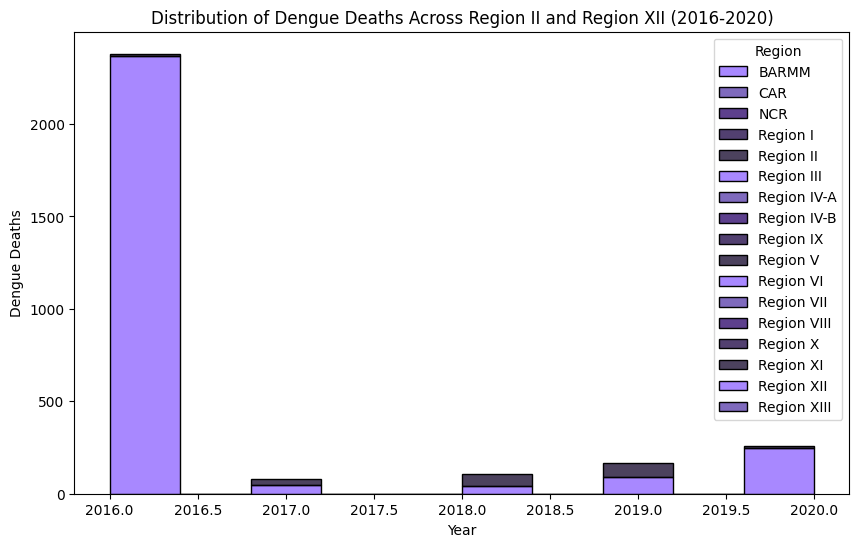

In [255]:
plt.figure(figsize=(10, 6))
sns.histplot(data=deng_region_2, x='Year', weights='Dengue_Deaths', hue='Region', multiple='stack', palette=['#8b60ff', '#5438a7', '#270067', '#180040', '#100328'])
plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.title('Distribution of Dengue Deaths Across Region II and Region XII (2016-2020)')
plt.show()


<h1> Insight 20 </h1>
<h3> Comparison of Total Dengue Cases Across Selected Regions (2015-2020) </h3>
<h5> Region III (Central Luzon) consistently reported the highest number of dengue cases from 2015 to 2020, followed by Western Visayas and CALABARZON. This suggests that dengue cases are more prevalent in densely populated or highly urbanized regions. </h5>


In [191]:
deng_2015_2020 = deng[deng['Year'].between(2015, 2020)]
dengue_cases_per_region = deng_2015_2020.groupby('Region')['Dengue_Cases'].sum().reset_index()
dengue_cases_per_region = dengue_cases_per_region.sort_values(by='Dengue_Cases', ascending=False)
dengue_cases_per_region

,Region,Dengue_Cases
6,Region IV-A,163029
5,Region III,131064
10,Region VI,117523
2,NCR,115966
11,Region VII,110683
13,Region X,82437
15,Region XII,59802
3,Region I,59066
12,Region VIII,51983
8,Region IX,47781


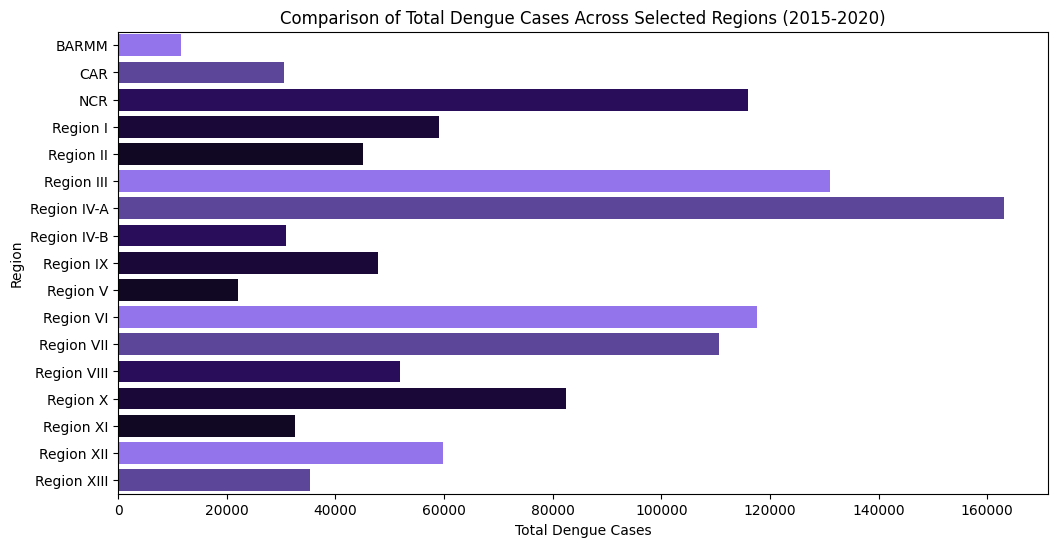

In [258]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dengue_cases_per_region, x='Dengue_Cases', y='Region', palette=['#8b60ff', '#5438a7', '#270067', '#180040', '#100328'])
plt.xlabel("Total Dengue Cases")
plt.ylabel("Region")
plt.title("Comparison of Total Dengue Cases Across Selected Regions (2015-2020)")
plt.show()


<h1> Insight 61 </h1>
<h3> Dengue Case Fatality Rates Across Different Regions (2015-2020) </h3>
<h5> Some regions, such as BARMM, show a higher case fatality rate despite having fewer dengue cases, indicating potential healthcare access or treatment challenges in the area. </h5>


In [17]:
dengue_cfr = deng.groupby('Region').agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()
dengue_cfr['CFR'] = (dengue_cfr['Dengue_Deaths'] / dengue_cfr['Dengue_Cases']) * 100  # CFR in percentage
dengue_cfr


,Region,Dengue_Cases,Dengue_Deaths,CFR
0,BARMM,11537,332,2.877698
1,CAR,30582,1008,3.296057
2,NCR,115966,4008,3.456185
3,Region I,59066,157,0.265804
4,Region II,45141,193,0.427549
5,Region III,131064,482,0.367759
6,Region IV-A,163029,652,0.399929
7,Region IV-B,30849,130,0.421408
8,Region IX,47781,532,1.113413
9,Region V,22167,185,0.834574


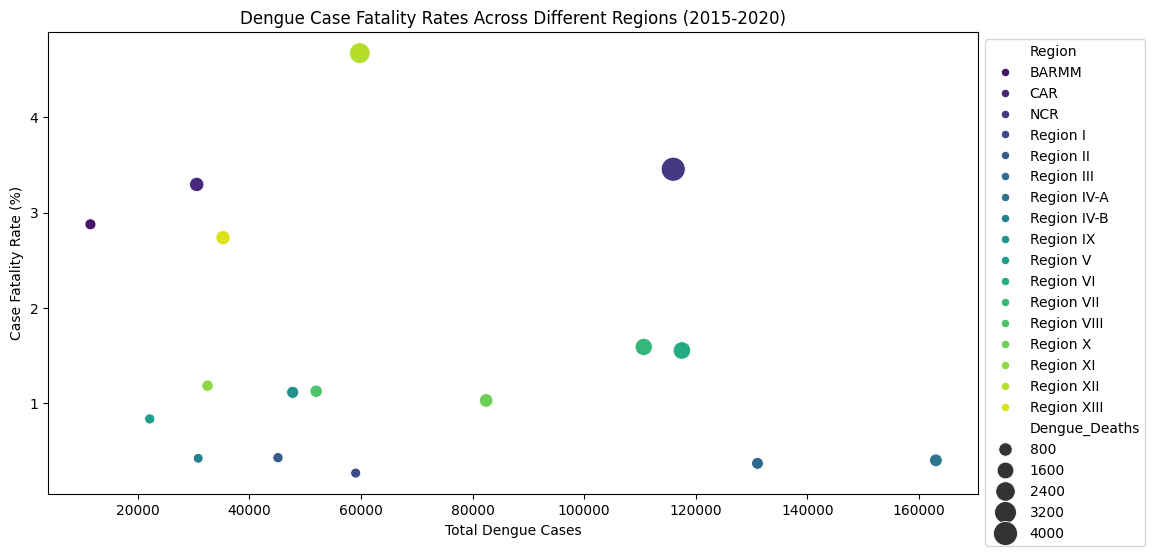

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dengue_cfr, x='Dengue_Cases', y='CFR', hue='Region', size='Dengue_Deaths', sizes=(50, 300), palette='viridis')
plt.xlabel("Total Dengue Cases")
plt.ylabel("Case Fatality Rate (%)")
plt.title("Dengue Case Fatality Rates Across Different Regions (2015-2020)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()